In [151]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report, confusion_matrix
import warnings
from scipy import stats
from imblearn.over_sampling import SMOTE
from sklearn.preprocessing import LabelEncoder
from sklearn.naive_bayes import GaussianNB

In [152]:
warnings.filterwarnings('ignore')
plt.style.use('fivethirtyeight')

In [153]:
df = pd.read_csv('death.csv')

In [154]:
df.head()

,index,County,FIPS,Met Objective of 45.5? (1),Age-Adjusted Death Rate,Lower 95% Confidence Interval for Death Rate,Upper 95% Confidence Interval for Death Rate,Average Deaths per Year,Recent Trend (2),Recent 5-Year Trend (2) in Death Rates,Lower 95% Confidence Interval for Trend,Upper 95% Confidence Interval for Trend
0,0,United States,0,No,46,45.9,46.1,"157,376",falling,-2.4,-2.6,-2.2
1,1,"Perry County, Kentucky",21193,No,125.6,108.9,144.2,43,stable,-0.6,-2.7,1.6
2,2,"Powell County, Kentucky",21197,No,125.3,100.2,155.1,18,stable,1.7,0,3.4
3,3,"North Slope Borough, Alaska",2185,No,124.9,73,194.7,5,**,**,**,**
4,4,"Owsley County, Kentucky",21189,No,118.5,83.1,165.5,8,stable,2.2,-0.4,4.8


In [155]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3141 entries, 0 to 3140
Data columns (total 12 columns):
 #   Column                                        Non-Null Count  Dtype 
---  ------                                        --------------  ----- 
 0   index                                         3141 non-null   int64 
 1   County                                        3141 non-null   object
 2   FIPS                                          3141 non-null   int64 
 3   Met Objective of 45.5? (1)                    3141 non-null   object
 4   Age-Adjusted Death Rate                       3141 non-null   object
 5   Lower 95% Confidence Interval for Death Rate  3141 non-null   object
 6   Upper 95% Confidence Interval for Death Rate  3141 non-null   object
 7   Average Deaths per Year                       3141 non-null   object
 8   Recent Trend (2)                              3141 non-null   object
 9   Recent 5-Year Trend (2) in Death Rates        3141 non-null   object
 10  

df.drop('County', axis=1, inplace=True)



# Check for missing values


In [156]:
df.isnull().sum()

index                                           0
County                                          0
FIPS                                            0
Met Objective of 45.5? (1)                      0
Age-Adjusted Death Rate                         0
Lower 95% Confidence Interval for Death Rate    0
Upper 95% Confidence Interval for Death Rate    0
Average Deaths per Year                         0
Recent Trend (2)                                0
Recent 5-Year Trend (2) in Death Rates          0
Lower 95% Confidence Interval for Trend         0
Upper 95% Confidence Interval for Trend         0
dtype: int64

# Preprocessing steps

Encode categorical variables

In [157]:
lb = LabelEncoder()
df_categorical = df.apply(lb.fit_transform)

Map the 'Recent Trend' column to numerical values

In [158]:
df_categorical['Recent Trend'] = df_categorical['Recent Trend (2)'].map({'falling': 1, 'stable': 2, 'rising': 4})


In [159]:
pip install imbalanced-learn

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


# Handle imbalanced data using RandomUnderSampler

In [160]:
from imblearn.under_sampling import RandomUnderSampler


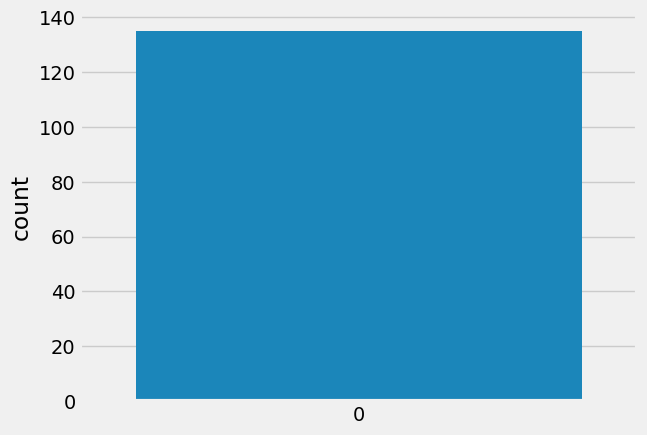

In [161]:
class_counts = df_categorical['Recent Trend (2)'].value_counts()
if len(class_counts) > 1:
    undersampler = RandomUnderSampler(random_state=42)
    X = df_categorical.drop('Recent Trend (2)', axis=1)
    y = df_categorical['Recent Trend (2)']
    X_resampled, y_resampled = undersampler.fit_resample(X, y)
    sns.countplot(y_resampled)
else:
    print("Error: The dataset is imbalanced.")

# Handle outliers in numerical features

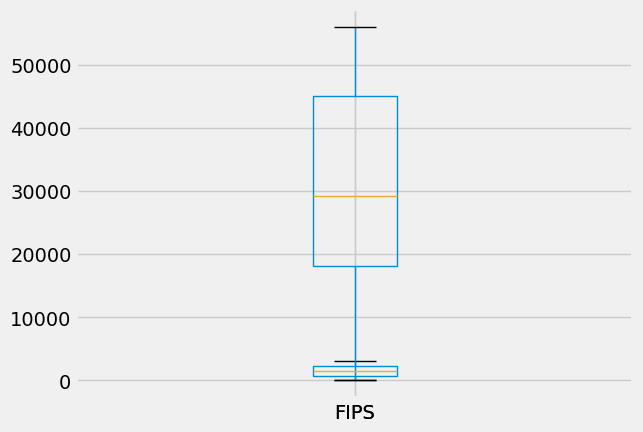

In [162]:
def outliers(df_numerical_scaler, var):
    IQR = df_numerical_scaler[var].quantile(0.75) - df_numerical_scaler[var].quantile(0.25)
    upper = df_numerical_scaler[var].quantile(0.75) + 1.5 * IQR
    lower = df_numerical_scaler[var].quantile(0.25) - 1.5 * IQR
    df_numerical_scaler[var] = np.where(df_numerical_scaler[var] > upper, upper,
                                        np.where(df_numerical_scaler[var] < lower, lower, df_numerical_scaler[var]))
    df_numerical_scaler[[var]].boxplot()

df_numerical_scaler = df.select_dtypes(include=[np.number])

for col in df_numerical_scaler.columns:
    outliers(df_numerical_scaler, col)

# Visualize numerical features

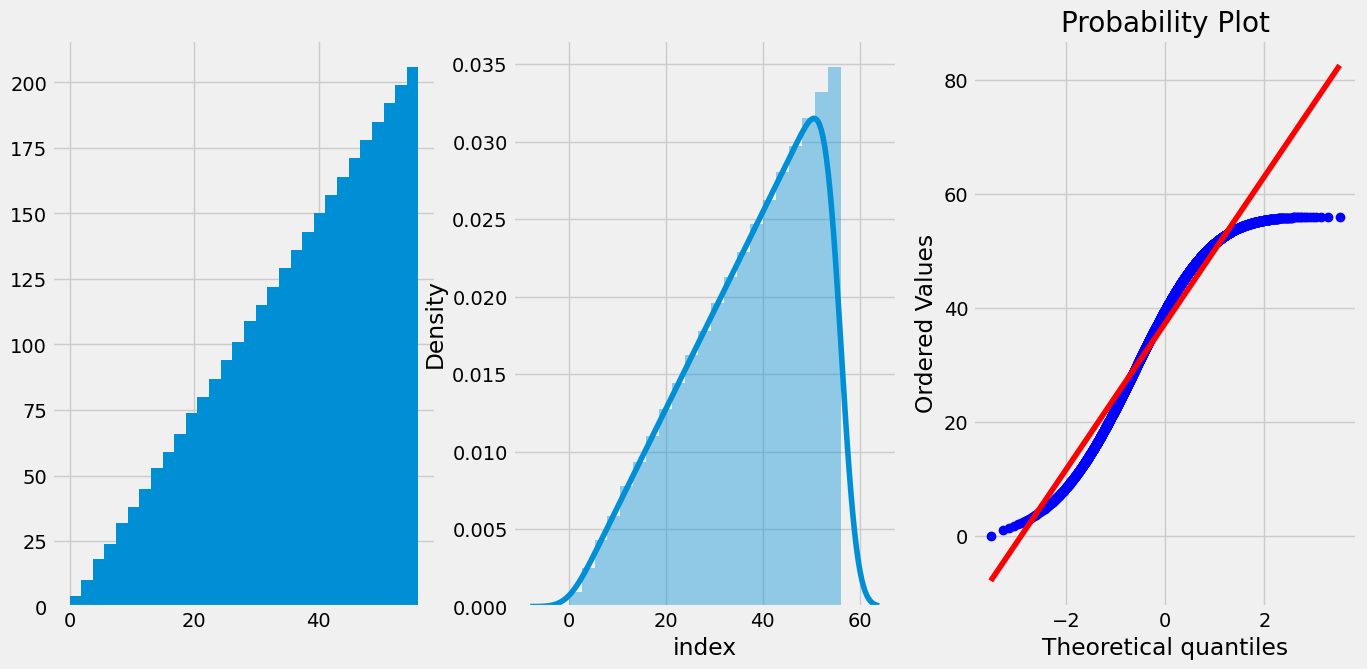

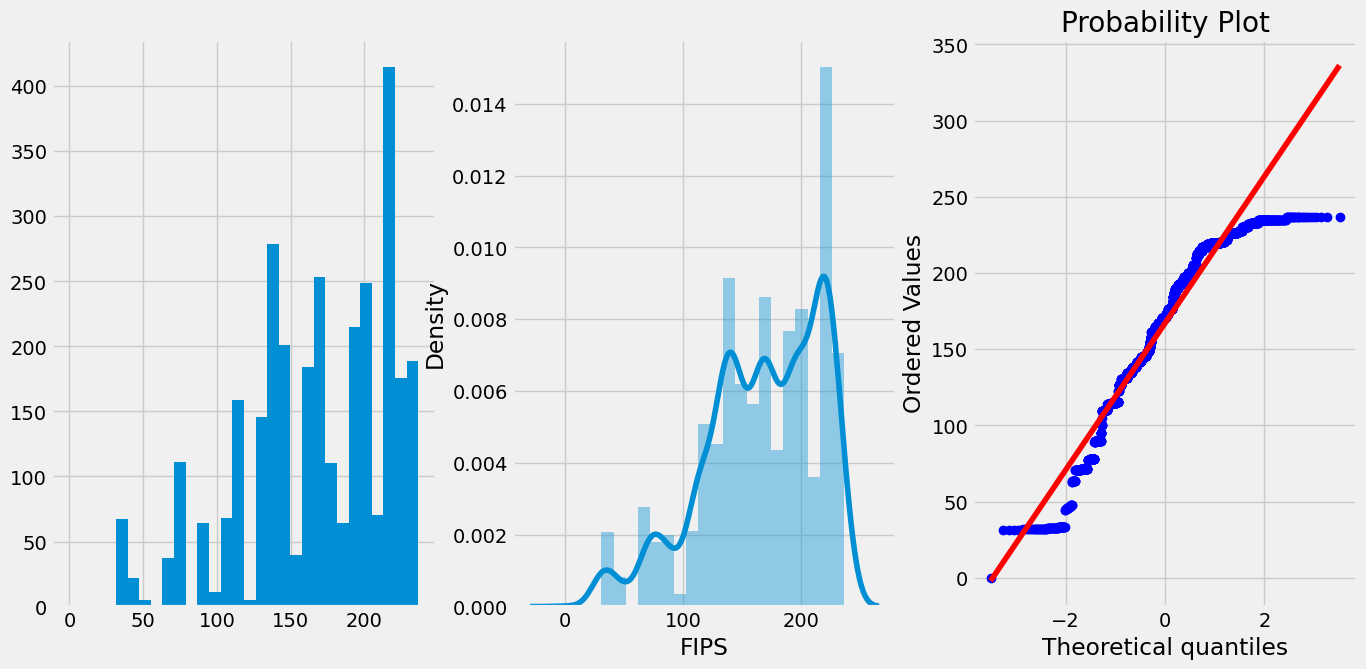

In [163]:
def plot_numerical_features(df_numerical, variable):
    plt.figure(figsize=(15, 7))
    plt.subplot(1, 3, 1)
    df_numerical[variable].hist(bins=30)
    plt.subplot(1, 3, 2)
    sns.distplot(df_numerical[variable])
    plt.subplot(1, 3, 3)
    stats.probplot(df_numerical[variable], dist='norm', plot=plt)
    plt.show()

df_numerical = df.select_dtypes(include=[np.number])
for col in df_numerical.columns:
    df_numerical[col] = np.sqrt(df_numerical[col])
    plot_numerical_features(df_numerical, col)

# Descriptive statistics

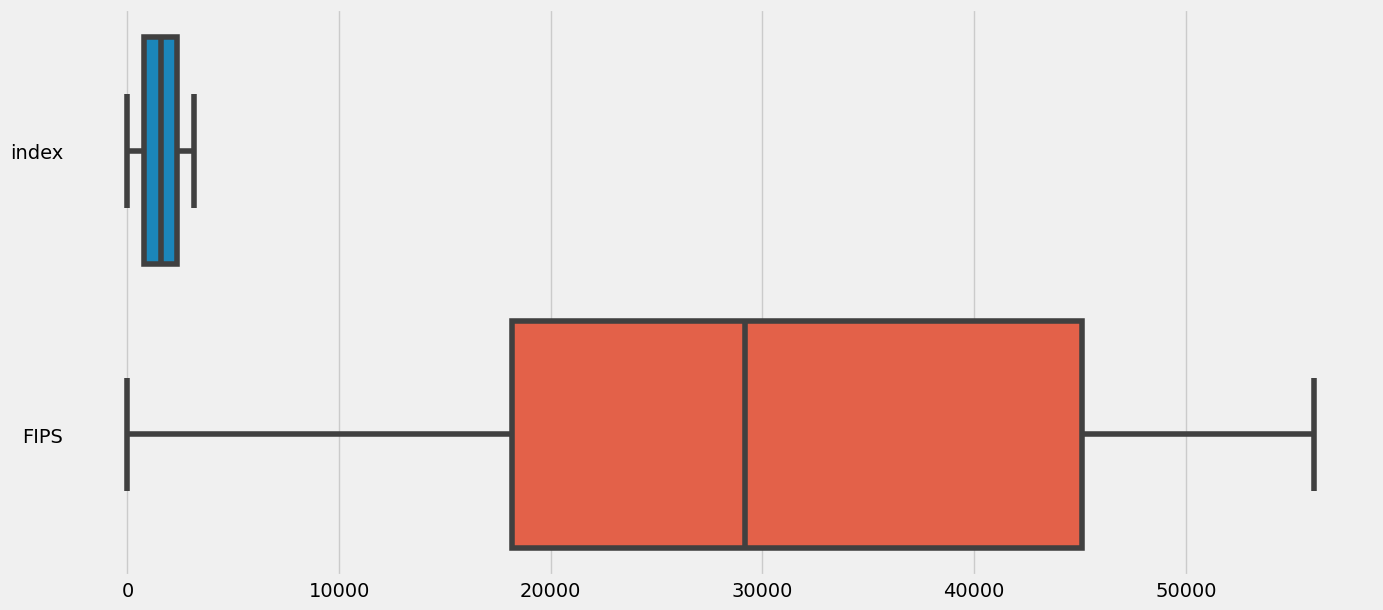

In [164]:
plt.figure(figsize=(15, 7))
sns.boxplot(data=df, orient='h')
plt.show()


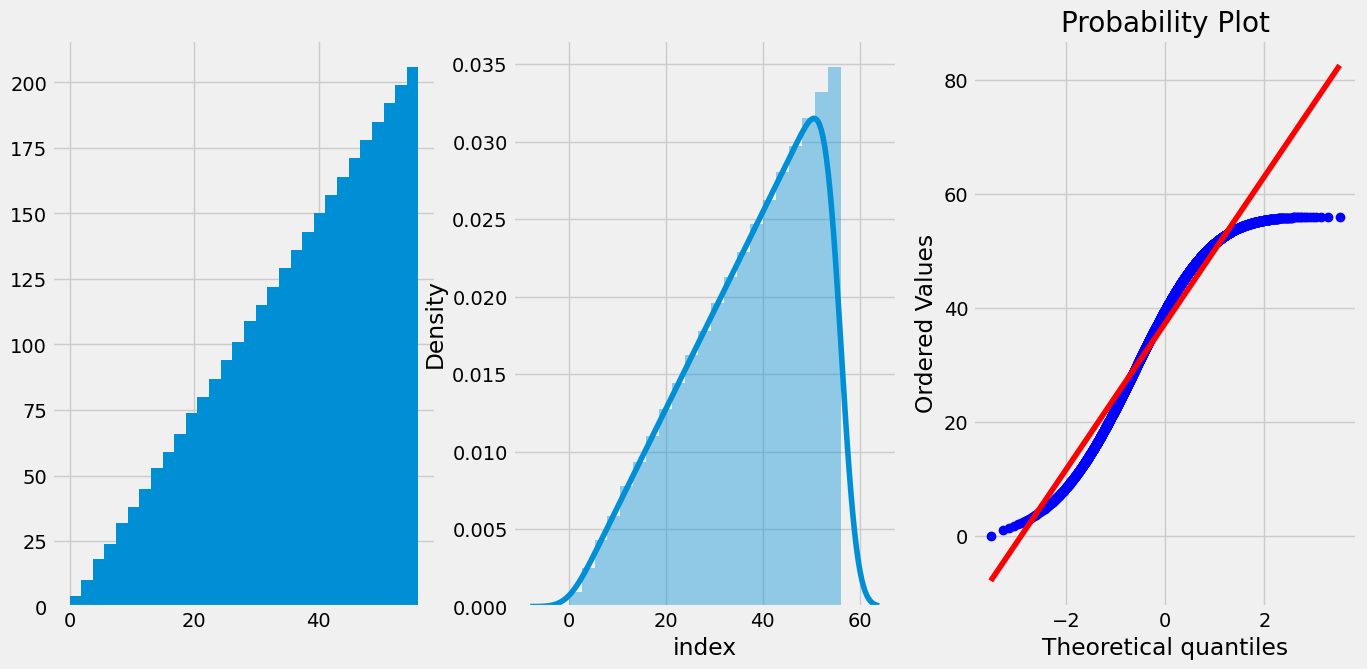

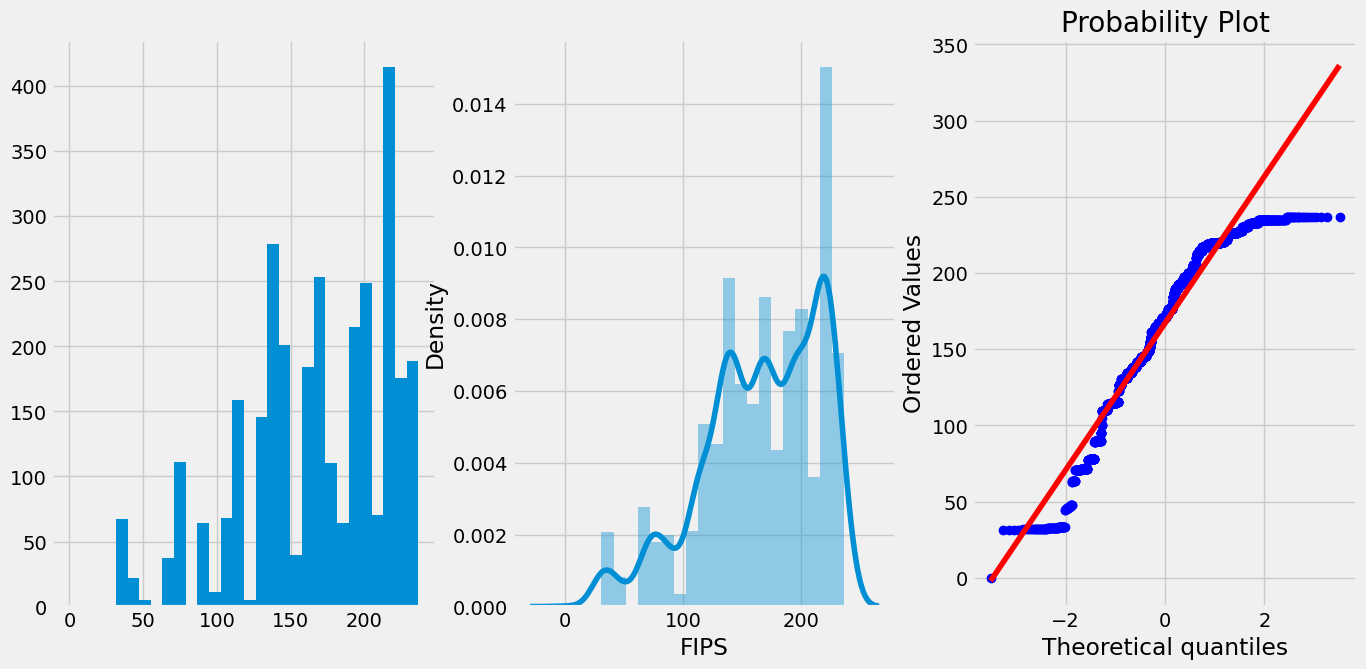

In [165]:
for col in df_numerical.columns:
    plot_numerical_features(df_numerical, col)

Visualize categorical features

<Axes: xlabel='County', ylabel='count'>

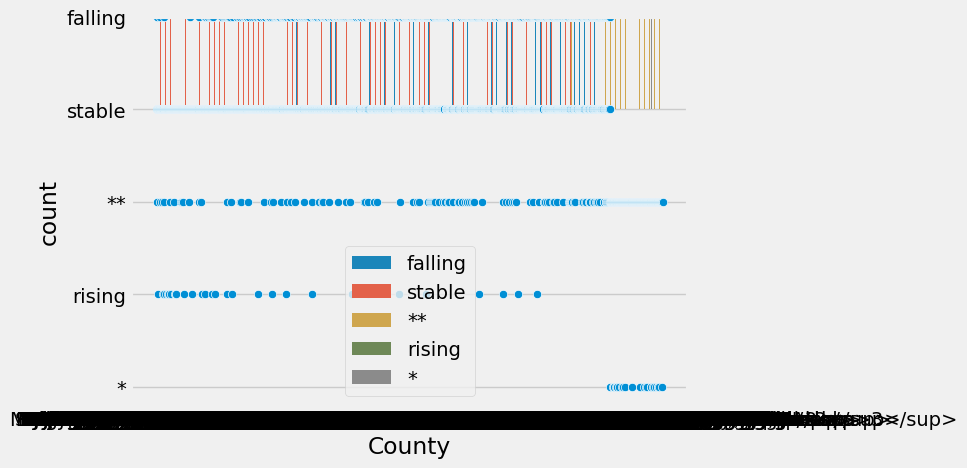

In [166]:
sns.countplot(x='County', hue='Recent Trend (2)', data=df)

sns.scatterplot(x='County', y='Recent Trend (2)', data=df)\



# Visualize pairwise relationships

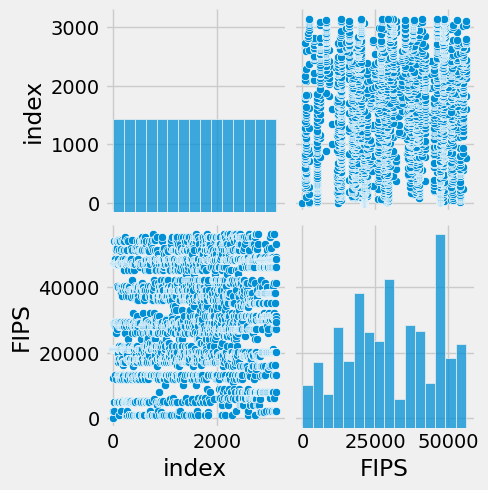

In [167]:
sns.pairplot(df)

# Split the data into training and testing sets

In [168]:
X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=0.2, random_state=42)

print(X_train.shape) 
print(X_test.shape) 
print(y_train.shape) 
print(y_test.shape)

(108, 12)
(27, 12)
(108,)
(27,)


# Training the models

In [169]:
from sklearn.impute import SimpleImputer
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from xgboost import XGBClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score



Decision Tree model

In [170]:

# Create an instance of SimpleImputer
imputer = SimpleImputer(strategy='mean')

# Fit and transform the training data
X_train_imputed = imputer.fit_transform(X_train)

# Transform the test data using the trained imputer
X_test_imputed = imputer.transform(X_test)

In [171]:
dt_classifier = DecisionTreeClassifier(max_depth=3)
dt_classifier.fit(X_train_imputed, y_train)
y_pred_dt = dt_classifier.predict(X_test_imputed)
dt_accuracy = accuracy_score(y_test, y_pred_dt)
print("Decision Tree Classifier Results (Smaller Max Depth):")
print("Accuracy:", dt_accuracy)
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred_dt))
print("Classification Report:")
print(classification_report(y_test, y_pred_dt))
print("Train score:", dt_classifier.score(X_train_imputed, y_train))
print("Test score:", dt_classifier.score(X_test_imputed, y_test))


Decision Tree Classifier Results (Smaller Max Depth):
Accuracy: 1.0
Confusion Matrix:
[[7 0 0 0 0]
 [0 7 0 0 0]
 [0 0 2 0 0]
 [0 0 0 6 0]
 [0 0 0 0 5]]
Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00         7
           1       1.00      1.00      1.00         7
           2       1.00      1.00      1.00         2
           3       1.00      1.00      1.00         6
           4       1.00      1.00      1.00         5

    accuracy                           1.00        27
   macro avg       1.00      1.00      1.00        27
weighted avg       1.00      1.00      1.00        27

Train score: 1.0
Test score: 1.0


XGB Model

In [172]:
xgb_classifier = XGBClassifier()
xgb_classifier.fit(X_train_imputed, y_train)
y_pred_xgb = xgb_classifier.predict(X_test_imputed)
xgb_accuracy = accuracy_score(y_test, y_pred_xgb)
print("XGBoost Classifier Results:")
print("Accuracy:", xgb_accuracy)
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred_xgb))
print("Classification Report:")
print(classification_report(y_test, y_pred_xgb))
print("Train score:", xgb_classifier.score(X_train_imputed, y_train))
print("Test score:", xgb_classifier.score(X_test_imputed, y_test))

XGBoost Classifier Results:
Accuracy: 1.0
Confusion Matrix:
[[7 0 0 0 0]
 [0 7 0 0 0]
 [0 0 2 0 0]
 [0 0 0 6 0]
 [0 0 0 0 5]]
Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00         7
           1       1.00      1.00      1.00         7
           2       1.00      1.00      1.00         2
           3       1.00      1.00      1.00         6
           4       1.00      1.00      1.00         5

    accuracy                           1.00        27
   macro avg       1.00      1.00      1.00        27
weighted avg       1.00      1.00      1.00        27

Train score: 1.0
Test score: 1.0


Random Forest Model

In [173]:

rf_classifier = RandomForestClassifier(n_estimators=100, max_depth=5)
rf_classifier.fit(X_train_imputed, y_train)
y_pred_rf = rf_classifier.predict(X_test_imputed)
rf_accuracy = accuracy_score(y_test, y_pred_rf)

print("Random Forest Classifier Results (Reduced Maximum Depth):")
print("Accuracy:", rf_accuracy)
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred_rf))
print("Classification Report:")
print(classification_report(y_test, y_pred_rf))
print("Train score:", rf_classifier.score(X_train_imputed, y_train))
print("Test score:", rf_classifier.score(X_test_imputed, y_test))

Random Forest Classifier Results (Reduced Maximum Depth):
Accuracy: 1.0
Confusion Matrix:
[[7 0 0 0 0]
 [0 7 0 0 0]
 [0 0 2 0 0]
 [0 0 0 6 0]
 [0 0 0 0 5]]
Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00         7
           1       1.00      1.00      1.00         7
           2       1.00      1.00      1.00         2
           3       1.00      1.00      1.00         6
           4       1.00      1.00      1.00         5

    accuracy                           1.00        27
   macro avg       1.00      1.00      1.00        27
weighted avg       1.00      1.00      1.00        27

Train score: 1.0
Test score: 1.0


KNN Model

In [174]:
knn_classifier = KNeighborsClassifier(n_neighbors=5)
knn_classifier.fit(X_train_imputed, y_train)
y_pred_knn = knn_classifier.predict(X_test_imputed)
knn_accuracy = accuracy_score(y_test, y_pred_knn)
print("K-Nearest Neighbors Classifier Results:")
print("Accuracy:", knn_accuracy)
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred_knn))
print("Classification Report:")
print(classification_report(y_test, y_pred_knn))
print("Train score:", knn_classifier.score(X_train_imputed, y_train))
print("Test score:", knn_classifier.score(X_test_imputed, y_test))

K-Nearest Neighbors Classifier Results:
Accuracy: 0.48148148148148145
Confusion Matrix:
[[6 1 0 0 0]
 [2 3 2 0 0]
 [0 0 1 0 1]
 [0 3 0 3 0]
 [2 0 2 1 0]]
Classification Report:
              precision    recall  f1-score   support

           0       0.60      0.86      0.71         7
           1       0.43      0.43      0.43         7
           2       0.20      0.50      0.29         2
           3       0.75      0.50      0.60         6
           4       0.00      0.00      0.00         5

    accuracy                           0.48        27
   macro avg       0.40      0.46      0.40        27
weighted avg       0.45      0.48      0.45        27

Train score: 0.6666666666666666
Test score: 0.48148148148148145


SVM Model


In [175]:
svm_classifier = SVC()
svm_classifier.fit(X_train_imputed, y_train)
y_pred_svm = svm_classifier.predict(X_test_imputed)
svm_accuracy = accuracy_score(y_test, y_pred_svm)
print("Support Vector Machine (SVM) Classifier Results:")
print("Accuracy:", svm_accuracy)
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred_svm))
print("Classification Report:")
print(classification_report(y_test, y_pred_svm))
print("Train score:", svm_classifier.score(X_train_imputed, y_train))
print("Test score:", svm_classifier.score(X_test_imputed, y_test))


Support Vector Machine (SVM) Classifier Results:
Accuracy: 0.48148148148148145
Confusion Matrix:
[[7 0 0 0 0]
 [3 2 2 0 0]
 [0 0 1 0 1]
 [0 0 3 3 0]
 [1 1 2 1 0]]
Classification Report:
              precision    recall  f1-score   support

           0       0.64      1.00      0.78         7
           1       0.67      0.29      0.40         7
           2       0.12      0.50      0.20         2
           3       0.75      0.50      0.60         6
           4       0.00      0.00      0.00         5

    accuracy                           0.48        27
   macro avg       0.44      0.46      0.40        27
weighted avg       0.51      0.48      0.45        27

Train score: 0.6111111111111112
Test score: 0.48148148148148145


Naive Bayes Model

In [176]:
nb_classifier = GaussianNB()
nb_classifier.fit(X_train_imputed, y_train)
y_pred_nb = nb_classifier.predict(X_test_imputed)
nb_accuracy = accuracy_score(y_test, y_pred_nb)
print("Naive Bayes Classifier Results:")
print("Accuracy:", nb_accuracy)
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred_nb))
print("Classification Report:")
print(classification_report(y_test, y_pred_nb))
print("Train score:", nb_classifier.score(X_train_imputed, y_train))
print("Test score:", nb_classifier.score(X_test_imputed, y_test))


Naive Bayes Classifier Results:
Accuracy: 0.9259259259259259
Confusion Matrix:
[[7 0 0 0 0]
 [0 7 0 0 0]
 [0 0 2 0 0]
 [0 0 0 4 2]
 [0 0 0 0 5]]
Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00         7
           1       1.00      1.00      1.00         7
           2       1.00      1.00      1.00         2
           3       1.00      0.67      0.80         6
           4       0.71      1.00      0.83         5

    accuracy                           0.93        27
   macro avg       0.94      0.93      0.93        27
weighted avg       0.95      0.93      0.92        27

Train score: 0.9814814814814815
Test score: 0.9259259259259259


Printing scores for all models

In [177]:
# Calculate average accuracy
average_accuracy = (dt_accuracy + knn_accuracy + svm_accuracy + xgb_accuracy + nb_accuracy + rf_accuracy) / 6

# Print overall scores
print("Overall Scores:")
print("Average Accuracy:", average_accuracy)
print("Decision Tree Classifier Accuracy:", dt_accuracy)
print("K-Nearest Neighbors Classifier Accuracy:", knn_accuracy)
print("Support Vector Machine Classifier Accuracy:", svm_accuracy)
print("XGBoost Classifier Accuracy:", xgb_accuracy)
print("Naive Bayes Classifier Accuracy:", nb_accuracy)
print("Random Forest Classifier Accuracy:", rf_accuracy)

Overall Scores:
Average Accuracy: 0.8148148148148149
Decision Tree Classifier Accuracy: 1.0
K-Nearest Neighbors Classifier Accuracy: 0.48148148148148145
Support Vector Machine Classifier Accuracy: 0.48148148148148145
XGBoost Classifier Accuracy: 1.0
Naive Bayes Classifier Accuracy: 0.9259259259259259
Random Forest Classifier Accuracy: 1.0


# Predict

In [178]:
y_pred_dt = dt_classifier.predict(X_test_imputed)
y_pred_dt

array([3, 2, 3, 0, 1, 2, 0, 4, 4, 4, 1, 1, 1, 3, 4, 1, 1, 0, 3, 3, 3, 0,
       0, 0, 0, 4, 1])

In [179]:
y_pred_nb = nb_classifier.predict(X_test_imputed)
y_pred_nb

array([4, 2, 3, 0, 1, 2, 0, 4, 4, 4, 1, 1, 1, 3, 4, 1, 1, 0, 4, 3, 3, 0,
       0, 0, 0, 4, 1])

In [180]:
y_pred_svm = svm_classifier.predict(X_test_imputed)
y_pred_svm

array([2, 2, 3, 0, 0, 4, 0, 2, 0, 2, 0, 2, 1, 3, 1, 0, 2, 0, 2, 3, 2, 0,
       0, 0, 0, 3, 1])

In [181]:
y_pred_rf = rf_classifier.predict(X_test_imputed)
y_pred_rf

array([3, 2, 3, 0, 1, 2, 0, 4, 4, 4, 1, 1, 1, 3, 4, 1, 1, 0, 3, 3, 3, 0,
       0, 0, 0, 4, 1])

In [182]:
y_pred_knn = knn_classifier.predict(X_test_imputed)
y_pred_knn

array([1, 2, 3, 0, 0, 4, 0, 2, 0, 2, 0, 2, 1, 3, 0, 1, 2, 0, 1, 3, 1, 1,
       0, 0, 0, 3, 1])

In [183]:
y_pred_xgb = xgb_classifier.predict(X_test_imputed)
y_pred_xgb


array([3, 2, 3, 0, 1, 2, 0, 4, 4, 4, 1, 1, 1, 3, 4, 1, 1, 0, 3, 3, 3, 0,
       0, 0, 0, 4, 1])

In [184]:
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.model_selection import cross_val_score

gnb = GaussianNB()

model = gnb.fit(X_train_imputed, y_train)
y_pred = model.predict(X_test_imputed)

accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

classification_report = classification_report(y_test, y_pred)
print("Classification Report:")
print(classification_report)

confusion_matrix = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(confusion_matrix)

cv_scores = cross_val_score(gnb, X_train_imputed, y_train, cv=11)
print("Cross-Validation Scores:")
print(cv_scores)

mean_cv_score = np.mean(cv_scores)
print("Mean Cross-Validation Score:", mean_cv_score)


Accuracy: 0.9259259259259259
Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00         7
           1       1.00      1.00      1.00         7
           2       1.00      1.00      1.00         2
           3       1.00      0.67      0.80         6
           4       0.71      1.00      0.83         5

    accuracy                           0.93        27
   macro avg       0.94      0.93      0.93        27
weighted avg       0.95      0.93      0.92        27

Confusion Matrix:
[[7 0 0 0 0]
 [0 7 0 0 0]
 [0 0 2 0 0]
 [0 0 0 4 2]
 [0 0 0 0 5]]
Cross-Validation Scores:
[1.         1.         1.         0.9        1.         1.
 0.9        1.         1.         1.         0.88888889]
Mean Cross-Validation Score: 0.9717171717171719


In [185]:
import pickle

# Define and train your model
nb_classifier = GaussianNB()
nb_classifier.fit(X_train_imputed, y_train)

# Save the trained model using pickle
pickle.dump(nb_classifier, open('naivemodel.pkl', 'wb'))


In [186]:
import pickle
import pandas as pd
from sklearn.preprocessing import OneHotEncoder

# Load the pickled model
pickled_model = pickle.load(open('naivemodel.pkl', 'rb'))

# Define the input data
input_data = {
    'County': ['Perry County, Kentucky'],
    'FIPS': [21193],
    'Met Objective of 45.5? (1)': ['No'],
    'Age-Adjusted Death Rate': [125.6],
    'Lower 95% Confidence Interval for Death Rate': [108.9],
    'Upper 95% Confidence Interval for Death Rate': [144.2],
    'Average Deaths per Year': [43],
    'Recent Trend (2)': ['stable'],
    'Recent 5-Year Trend (2) in Death Rates': [-0.6],
    'Lower 95% Confidence Interval for Trend': [-2.7],
    'Upper 95% Confidence Interval for Trend': [1.6]
}

# Convert the input data to a DataFrame
input_df = pd.DataFrame(input_data)

# One-hot encode the categorical features
categorical_features = ['County', 'Met Objective of 45.5? (1)', 'Recent Trend (2)']
encoder = OneHotEncoder(handle_unknown='ignore')
input_encoded = encoder.fit_transform(input_df[categorical_features]).toarray()

# Concatenate the encoded features with the numerical features
input_features = pd.concat([pd.DataFrame(input_encoded), input_df.drop(columns=categorical_features)], axis=1)

# Convert column names to strings
input_features.columns = input_features.columns.astype(str)

# Make predictions on the input data using the trained model
predictions = pickled_model.predict(input_features)

# Print the predictions
print("Predictions:", predictions)


Predictions: [1]
